#  TP 1 : Représentation des solutions d'une EDO, résolution approchée par le schéma d'Euler explicite

Soit $f:\mathbb{R}\times\mathbb{R}\longrightarrow\mathbb{R}$ une fonction de classe $C^1$ et considérons l'équation différentielle
$$
(E)\ \ \ \ \ \ \ y'(t)=f(t,y(t)).
$$
On remarque que le signe de la fonction $f$ dans le plan $(t,y)$ donne le sens de variation des solutions de l'équation $(E).$ 

On appelle **champ de vecteurs** associé à $(E)$ l'application 
$$
V:\mathbb{R}\times\mathbb{R}\longrightarrow\mathbb{R}\times\mathbb{R},\ \ \ (t,y)\mapsto\big(1,f(t,y)\big).
$$

On représente le champ de vecteurs en un point $P=(\bar{t},\bar{y})$ du plan par une flèche correspondant au segment $[P,P+\varepsilon V(P)],$ avec $\varepsilon$ petit, partant de $P$ et pointant vers $P+\varepsilon V(P)$.

On remarque alors que si $y(t)$ est une solution de $(E)$ qui passe par le point $P$, le vecteur $V(P)$ est tangent au graphe de $y$ au point $P.$

Dans la première partie de ce TP nous allons observer ces propriétés.

## 1. Représentation des solutions d'une EDO

Nous nous intéressons aux trois équations suivantes :

\begin{equation}
(1)\ \ \ \ \ \ \ y'=-2ty,
\end{equation}

\begin{equation}
(2)\ \ \ \ \ \ \ y'=y-t^2,
\end{equation}

\begin{equation}
(3)\ \ \ \ \ \ \ y'=ty^2.
\end{equation}

**Q1)** Déterminer les solutions de chacune des équations 1, 2 et 3.

> **Réponse:** 

Solution générale de (1) :
$$
y:\mathbb{R}\longrightarrow\mathbb{R},\ \ \ y(t)=Ce^{-t^2},\ \ \ C\in\mathbb{R}.
$$

Solution générale de (2) :
$$
y:\mathbb{R}\longrightarrow\mathbb{R},\ \ \ y(t)=Ce^{t}+t^2+2t+2,\ \ \ C\in\mathbb{R}.
$$

Solution générale de (3) :
$$
y:\Big\{t\,|\,C+\frac{t^2}{2}\neq0\Big\}\longrightarrow\mathbb{R},\ \ \ y(t)=\frac{-1}{C+\frac{t^2}{2}},\ \ \ C\in\mathbb{R}.
$$

**Q2)** Considérons l'équation 1. Tracer sur le même graphique, dans l'intrevalle $[-3,3],$ la solution de 1 qui vérifie $y(0)=1$ et la solution de 1 qui vérifie la condition initiale $y(0)=2.$ 


Text(0,0.5,'y')

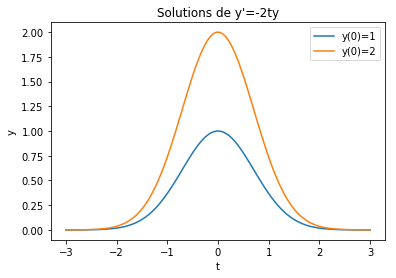

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fonction f définissant l'EDO

def f1(t,y):
    return -2*t*y

# Solution de l'EDO

def y1(t,y0):
    return y0*np.exp(-t**2)

plt.figure(1)
tt=np.linspace(-3,3,100)
Y1=y1(tt,1)
Y2=y1(tt,2)
plt.plot(tt,Y1,label='y(0)=1')
plt.plot(tt,Y2,label='y(0)=2')
plt.title('Solutions de y\'=-2ty')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')


### Tracé du champ de vecteurs.

**Q3)** Dans la figure de l'exercice 1, tracer dans le plan $(t,y)$ le champ de vecteurs associé à l'équation 1, en utilisant les commandes :
`t=np.linspace(-3,3,31)
y=np.linspace(0,2.2,23)
T,Y=np.meshgrid(t,y)
U=np.ones(T.shape)/np.sqrt(1+f1(T,Y)**2)
V=f1(T,Y)/np.sqrt(1+f1(T,Y)**2)
plt.quiver(T,Y,U,V,angles='xy',scale=20,color='blue')`

Ci-dessus, `f` désigne la fonction définissant le second membre de 1.
Limiter le graphique à la fenêtre $[-3,3]\times[0,2.2]$ à l'aide de la commande `plt.axis`
Rajouter des légendes, des labels pour les axes et un titre à votre graphique.

Text(0,0.5,'y')

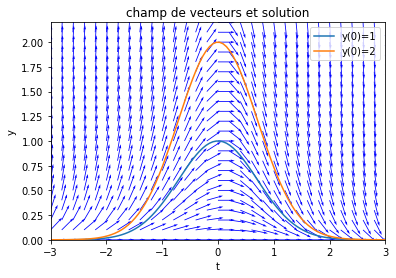

In [2]:
plt.plot(tt,Y1,label='y(0)=1')
plt.plot(tt,Y2,label='y(0)=2')
t=np.linspace(-3,3,31)
y=np.linspace(0,2.2,23)
T,Y=np.meshgrid(t,y)
U=np.ones(T.shape)/np.sqrt(1+f1(T,Y)**2)
V=f1(T,Y)/np.sqrt(1+f1(T,Y)**2)
plt.quiver(T,Y,U,V,angles='xy',scale=20,color='blue')
plt.axis([-3,3,0.,2.2])
plt.title('champ de vecteurs et solution')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')


**Q4)** Refaire le même exercice pour l'équation 3, en représentant les solutions qui vérifient $y(0)=1$ et  $y(0)=-1$

Text(0.5,1,'champ de vecteurs et solution')

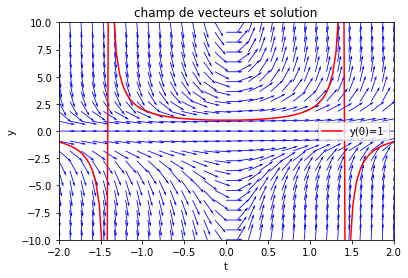

In [3]:
# Fonction f définissant l'EDO

def f3(t,y):
    return t*y**2

# Solution de l'EDO

def y3(t,y0):
    return -1/(-1/y0+.5*t**2)

plt.figure(1)
tt=np.linspace(-2,2,100)
Y1=y3(tt,1)
plt.plot(tt,Y1,label='y(0)=1',color='r')
plt.title('Solutions de y\'=ty^2')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')

t=np.linspace(-2,2,31)
y=np.linspace(-10,10,23)
T,Y=np.meshgrid(t,y)
U=np.ones(T.shape)/np.sqrt(1+f3(T,Y)**2)
V=f3(T,Y)/np.sqrt(1+f3(T,Y)**2)
plt.quiver(T,Y,U,V,angles='xy',scale=20,color='blue')
plt.axis([-2,2,-10,10])
plt.title('champ de vecteurs et solution')



### Calcul d'une solution approchée d'une EDO : votre premier schéma numérique.

On considère le problème de Cauchy pour l'équation différentielle $(E),$ 
\begin{equation}
(4)\ \ \ \ \left\{\begin{aligned}
  y'(t) & =  f(t,y(t)), \\
  y(t_0) & =  y_0,
\end{aligned} \right.
\end{equation}
où l'instant initial $t_0\in\mathbb{R}$ et la valeur initiale $y_0\in\mathbb{R}$ sont donnés. 

On suppose que ce problème a une unique solution $y:J\longrightarrow\mathbb{R}$ définie dans un intervalle $J\subseteq\mathbb{R}.$ On s'intéresse ici à trouver numériquement une solution approchée de $y$, dans un intervalle de la forme $[t_0, t_f]\subseteq J.$ 

Pour ce faire, on se donne $\Delta t>0$ *petit* et on considère une subdivision uniforme de pas $\Delta t$ de l'intervalle $[t_0, t_f].$ On peut le faire en se donnant $N\in\mathbb{N}$ *grand*, en posant $\Delta t=\frac{t_f-t_0}{N}$ et en considérant les $(N+1)$ points  
$$
t_0,\ t_1:=t_0+\Delta t,\ \cdots,\ t_N:=t_0+N\Delta t=t_f. 
$$

On cherche alors des valeurs $y^0,\ y^1,\cdots,\ y^N$ qui approchent la solution exacte de (PC) respectivement aux points $t_0,\ t_1,\cdots,\ t_N.$ On va définir ces valeurs par un *schéma numérique*.

On pose $y^0=y_0.$ Soit $n\in\{1,\dots,N\}.$ Une idée pour calculer une valeur $y^n$ approchant $y(t_n)$ (la solution exacte à l'instant $t_n$) est d'approcher la dérivée de $y$ par un taux d'accroissement au point $t_n$ et d'utiliser l'équation $(E).$ La solution exacte de $(E)$ vérifie
$$
y'(t)=f(t,y(t)),
$$
en chaque point $t$ et 
$$
y'(t)\approx \frac{y(t+\Delta t)-y(t)}{\Delta t},
$$
on remplace alors l'équation $y'(t)=f(t,y(t))$ par l'équation
 $$\frac{y(t+\Delta t)-y(t)}{\Delta t}=f(t,y(t)),$$
en chaque point $t_n$ de la subdivision considérée, puisque l'on a alors
 $$
\frac{y(t_{n+1})-y(t_n)}{\Delta t}\approx f(t_n,y(t_n)).
 $$


On obtient ainsi très simplement un premier schéma numérique : le schéma d'Euler explicite, pour lequel $y^0,\dots,y^N$ sont définis comme suit

** Schéma d'Euler explicite** :   
$$
\begin{cases}
y^0=y_0,\\
y^{n+1}=y^{n}+\Delta t f(t_n,y^{n}),\ \ \ \textrm{pour }\ n\in\{0,\dots,N-1\}.
\end{cases}
$$  


**Q5)** Écrire sur papier le schéma d'Euler associé à l'équation (1).

> **Réponse:** 

$y^{n+1}=y^{n}+\Delta -2t_ny^{n}$

**Q6)** Écrire une fonction python de la forme

`euler_exp(t0, tf, y0, deltaT)`

prenant en argument  les extrémités **t0** et **tf** de l'intervalle de temps $[t_0,t_f],$ la donnée initiale $y_0$, le pas de temps $\Delta t$. Cette fonction `euler_exp` devra retourner deux vecteurs : 

- $[t_0,\, t_1,\, ...,\, t_N],$  tableau `numpy` unidimensionnel de taille $(N+1)\times 1,$ représentant la subdivision de l'intervalle $[t_0,t_f]$ de pas $\Delta t$ considérée, 

- $[y_0,\, y_1,\, ...,\, y_N],$ tableau `numpy` de taille $(N+1)\times 1,$ représentant la solution approchée aux instants $t_n,\ n=0,\dots,N.$


In [4]:
def euler_exp(t0,tf,y0,dt):
    T=np.arange(t0,tf+dt,dt)
    N=T.size
    Y=np.zeros(N)
    Y[0]=y0
    for n in range(N-1):
        Y[n+1]=Y[n]-2*dt*T[n]*Y[n]
    return T,Y


**Q7)** Tracer sur une même fenêtre graphique pour la donnée initiale $y(0)=1$ :

- La solution exacte sur l'intervalle $[0,1]$ discrétisé avec un pas de temps de $10^{-4}$ ;

- Les 3 solutions approchées sur le même intervalle obtenues avec la méthode d'Euler avec des pas de temps $\Delta t$ égaux à $1/4,\ 1/10,\ 1/100.$
Rajouter des légendes à votre graphique.

Text(0.5,1,'solution exacte et solutions approchées pour différents valeurs de $\\Delta t$')

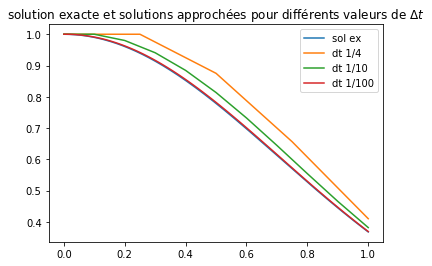

In [5]:
# solution approchée de l'edo1 obtenue par le schéma d'EE 

t0=0.
tf=1.
y0=1.

# solution exacte
tt=np.arange(0,1+0.0001,0.0001)
yy=y1(tt,y0)


dt1=1./4
dt2=1./10
dt3=1./100

T1,Y1=euler_exp(t0,tf,y0,dt1)
T2,Y2=euler_exp(t0,tf,y0,dt2)
T3,Y3=euler_exp(t0,tf,y0,dt3)

plt.figure(5)
plt.plot(tt,yy,label='sol ex')
plt.plot(T1,Y1,label='dt 1/4')
plt.plot(T2,Y2,label='dt 1/10')
plt.plot(T3,Y3,label='dt 1/100')
plt.legend()
plt.title('solution exacte et solutions approchées pour différents valeurs de $\Delta t$')


**Q8)** Modifier la fonction `euler_exp` (ou définissez une nouvelle fonction) de façon à ce qu'elle prenne la fonction $f$ définissant l'équation différentielle $y'=f(t,y)$ en argument.  
`euler\_exp(t0, tf, y0, deltaT,f)`

In [6]:
def euler_exp(t0,tf,y0,dt,f):
    T=np.arange(t0,tf+dt,dt)
    N=T.size
    Y=np.zeros(N)
    Y[0]=y0
    for n in range(N-1):
        Y[n+1]=Y[n]+dt*f(T[n],Y[n])
    return T,Y



**Q9)** Reprenez la question **Q7)** avec votre nouvelle fonction.

**Remarque** Pour programmer le schéma d'Euler, on peut aussi construire une fonction python de la forme `euler_exp(t0, tf, y0, N,f)`, en donnant comme argument le nombre de points $N$ que l'on considère dans la subdivision de l'intervalle $[t_0,t_f].$ Dans ce cas, il faudra définir le pas $\Delta t$ à l'intérieur de la fonction.

Text(0.5,1,'solution exacte et solutions approchées pour différents valeurs de $\\Delta t$')

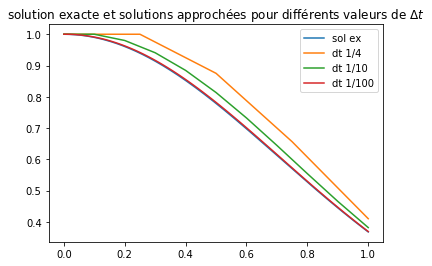

In [7]:
T1,Y1=euler_exp(t0,tf,y0,dt1,f1)
T2,Y2=euler_exp(t0,tf,y0,dt2,f1)
T3,Y3=euler_exp(t0,tf,y0,dt3,f1)

plt.figure(5)
plt.plot(tt,yy,label='sol ex')
plt.plot(T1,Y1,label='dt 1/4')
plt.plot(T2,Y2,label='dt 1/10')
plt.plot(T3,Y3,label='dt 1/100')
plt.legend()
plt.title('solution exacte et solutions approchées pour différents valeurs de $\Delta t$')


## 2. Modèles de croissance d'une population

**Modèle de Malthus** 

Considérons une population d'individus isolée dont on note $P(t)$ sa taille à l'instant $t.$ 

Le modèle le plus simple pour décrire l'évolution de cette population est donné par l'équation différentielle
\begin{equation}
P'(t)=(n-d)P(t),
\tag{M}
\end{equation}
où $n$ et $d$ sont des constantes positives qui représentent respectivement les taux de naissances et de décès de la population.

**Q1)** Soit $P_0\in\mathbb{R}^+$ la population à l'instant initial $t=0.$ Donner la solution $P(t)$ de $(M)$ qui vérifie $P(0)=P_0.$ Comment évolue la population lorsque $n>d$ ? Et lorsque $d>n$ ? Interpréter. 


**Modèle de Verhulst** Un deuxième modèle suppose que la croissance de la population est inhibée par la limitation des ressources et que la population ne dépasse pas une taille critique donnée par une constante $K>0.$ Si on note $P_0\ge0$ la population à l'instant initiale, l'évolution de la population est modélisée par les équations 

\begin{equation}
\begin{cases}
P'(t)=(n-d)P(t)\big(1-\frac{P(t)}{K}\big),\\
P(0)=P_0.
\end{cases}
\tag{V}
\end{equation}

 **Q2)** Montrer que le problème de Cauchy $V$ admet une unique solution maximale définie dans un intervalle $J\subseteq\mathbb{R}$ tel que $0\in J.$

> **Réponse:** 

La fonction $f(t,x)$ est $C^1$ donc loc. lip. On peut appliquer le thm de Cauchy-Lipschitz et on obtient qu'il existe une unique solution maximale $P:J\to\mathbb{R}$





 **Q3)** Quelle est la solution de $V$ lorsque  $P_0=0$ et lorsque $P_0=K$ ?

> **Réponse:** 

Si $P_0=0$, la solution de $V$ est la fonction $P(t)=0,\ t\in\mathbb{R}.$
Si $P_0=K$, la solution de $V$ est la fonction $P(t)=K,\ t\in\mathbb{R}.$


**Q4)** Soit $P_0\in (0,K)$, montrer que la solution maximale est globale à droite et calculer $\lim_{t\to\infty}P(t)$

> **Réponse:** 

la solution est bornée par $0$ et $K$, on applique le thm d'explosion en temps finis et on obtien que la solution est globale à droite. On verifie facilement que $\lim_{t\to\infty}P(t)=K$.


**Q5)** On considère dans cette question $n=1,\ d=0.75$ et $K=200.$ Utiliser le schéma d'Euler explicite pour obtenir une solution approchée du problème $V$, de donnée initiale $P_0=10,$ dans l'intervalle de temps $[0,50],$ avec un pas $\Delta t=1.$ Représenter graphiquement la solution obtenue. 

Illustrer, dans un nouveau graphique, l'évolution de la population lorsque la donnée initiale est telle que $P_0>K.$ Interpréter le résultat obtenu.


Text(0.5,1,'solutions du modèle de Verhulst')

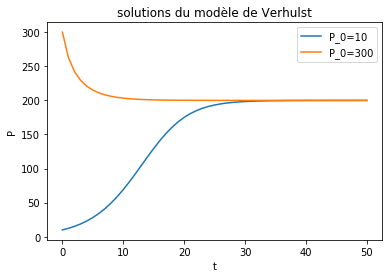

In [27]:
# Modèle de Verhulst

n=1
d=0.75
K=200

def fV(t,P):
    return (n-d)*P*(1-P/K)

P0=10
P0til=300
t0=0
tf=50
dt=1

T1,Y1=euler_exp(t0,tf,P0,dt,fV)
T2,Y2=euler_exp(t0,tf,P0til,dt,fV)

plt.figure(6)

plt.plot(T1,Y1,label='P_0=10')
plt.plot(T2,Y2,label='P_0=300')
plt.legend()
plt.xlabel('t')
plt.ylabel('P')
plt.title('solutions du modèle de Verhulst')


**Un modèle d'évolution d'une population de saumons**
Le modèle suivant décrit l'évolution du nombre d'individus d'une population de saumons :

\begin{equation}
\begin{cases}
P'(t)=(2-\cos(t))P(t)-\frac 12 P^2(t)-1,\\
P(0)=P_0,
\end{cases}
\tag{S}
\end{equation}

où $P_0$ est la population à l'instant initial. Le terme positif périodique $2-\cos(t)$ correspond à un taux de naissances saisonnier. Le modèle suppose que les décès sont proportionnels au carré du nombre d'individus dans la population et le terme indépendante avec signe négatif $-1$ modélise une proportion d'individus péchés.

**Q6)** Utiliser le schéma d'Euler explicite pour obtenir une solution approchée du problème $S$, de donnée initiale $P_0=5,$ dans l'intervalle de temps $[0,10],$ avec un pas $\Delta t=0.01.$ Représenter graphiquement la solution obtenue. 


No handles with labels found to put in legend.


Text(0.5,1,'solutions du modèle Saumons avec P0=5')

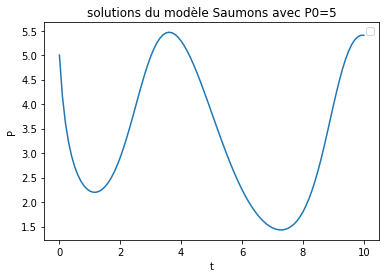

In [28]:

# Modèle d'évolution population de saumons

def fS(t,P):
    return (2-np.cos(t))*P-(P**2)/2-1

P0=5
t0=0
tf=10
dt=0.1

T,Y=euler_exp(t0,tf,P0,dt,fS)

plt.figure(7)

plt.plot(T,Y)
plt.legend()
plt.xlabel('t')
plt.ylabel('P')
plt.title('solutions du modèle Saumons avec P0=5')

